## Importing Necessary Libraries And The Data

In [37]:
## importing necessary libraries
import numpy as np
import random
import time
import tensorflow as tf
from matplotlib import pyplot as plt

## loading data from tensorflow datasets
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

## changing the data_type into float
x_train = np.array(x_train,dtype='float64')
x_test = np.array(x_test,dtype='float64')

## Visualizing The MNIST Data

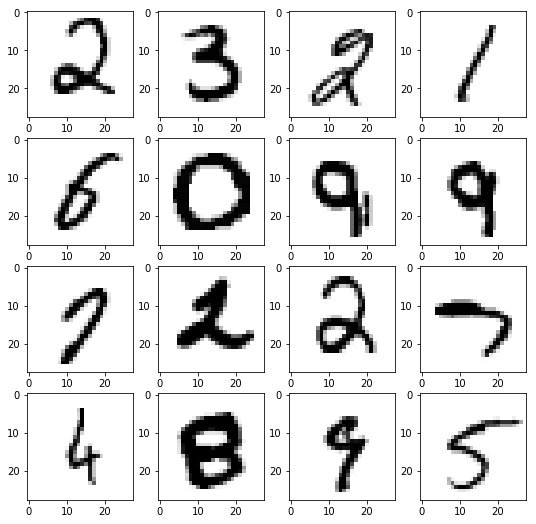

In [38]:
## creating a figure and deciding number of rows and columns
fig = plt.figure(figsize=(9,9))
columns, rows = 4, 4

for i in range(1, rows*columns + 1):
    ## generating a random image from the x_train
    index = np.random.randint(0,48000)
    img = x_train[index].reshape(28,28)
    ## adding the image to the subplot
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap=plt.cm.binary)
    
## showing our image
plt.show()

## Splitting The Data

### Splitting the data into training, test, validation and dev sets.

In [39]:
## decding number of examples to allot to each set
num_training = 60000
num_validation = 2000
num_test = 2000
num_dev = 1000

## our training set will be the orignal training set
## and hence we will keep our training set untouched

## rest all the sets will be alloted from the test set
## validation set
x_val = x_test[:num_validation]
y_val = y_test[:num_validation]

## test set
x_test = x_test[num_validation : num_validation +num_test]
y_test = y_test[num_validation : num_validation +num_test]

## dev set
## so our dev set is actually going to be a subset of our training set 
## The dev test will help us to make us run our code faster
mask = np.random.choice(num_training, num_dev, replace=False)
x_dev = x_train[mask]
y_dev = y_train[mask]

## printing the dimensions of all the sets and their labels
print("Training Data Shape : ",x_train.shape)
print("Training Labels Shape : ",y_train.shape)
print("Test Data Shape : ",x_test.shape)
print("Test Labels Shape : ",y_test.shape)
print("Validation Data Shape : ",x_val.shape)
print("Validation Labels Shape : ",y_val.shape)
print("Dev Data Shape : ",x_dev.shape)
print("Dev Labels Shape : ",y_dev.shape)

Training Data Shape :  (60000, 28, 28)
Training Labels Shape :  (60000,)
Test Data Shape :  (2000, 28, 28)
Test Labels Shape :  (2000,)
Validation Data Shape :  (2000, 28, 28)
Validation Labels Shape :  (2000,)
Dev Data Shape :  (1000, 28, 28)
Dev Labels Shape :  (1000,)


## Preprocessing Images
### Reshaping Images into Rows

In [40]:
## reshaping the images into rows
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
x_dev = x_dev.reshape(x_dev.shape[0],-1)
x_val = x_val.reshape(x_val.shape[0],-1)

## as a sanity check printing the shape of the data
print('Training Data Shape : ',x_train.shape)
print('Test Data Shape : ',x_test.shape)
print('Validation Data Shape : ',x_val.shape)
print('Dev Data Shape : ',x_dev.shape)

Training Data Shape :  (60000, 784)
Test Data Shape :  (2000, 784)
Validation Data Shape :  (2000, 784)
Dev Data Shape :  (1000, 784)


## Computing The Mean Image
## So that we can later subtract it from all our data so to normalize it

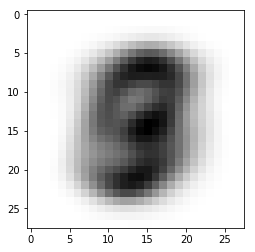

In [41]:
## computing the mean image
mean_image = np.mean(x_train, axis = 0)

## printing our mean image
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape(28,28),cmap=plt.cm.binary)
plt.show()

## Subtracting the mean image from all of our data



  A Certain Image Before Mean Image Subtraction


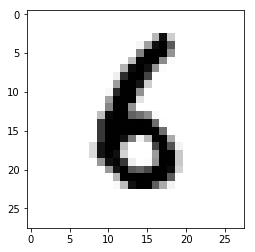


  Same Image After Mean Image Subtraction


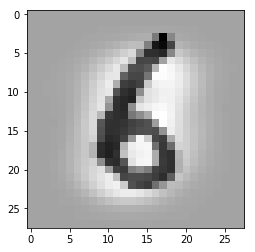

In [42]:
## prinitng a sample before and after image after subtracting mean image

print('\n\n  A Certain Image Before Mean Image Subtraction')
plt.imshow(x_train[1020].reshape(28,28),cmap=plt.cm.binary)
plt.show()
sample_image = x_train[1020] - mean_image
plt.imshow(sample_image.reshape(28,28),cmap=plt.cm.binary)
print('\n  Same Image After Mean Image Subtraction')
plt.show()

## subtracting mean image from all of our sets
x_train -= mean_image
x_test -= mean_image
x_dev -= mean_image
x_val -= mean_image

## The Bias Trick
### Using The Bias Trick And Appending an Extra Dimension to The Weight Matrix

In [43]:
## third: append the bias dimension of ones (i.e. bias trick) so that our SVM
## only has to worry about optimizing a single weight matrix w.

x_train = np.hstack([x_train, np.ones((x_train.shape[0],1))])
x_test = np.hstack([x_test, np.ones((x_test.shape[0],1))])
x_val = np.hstack([x_val, np.ones((x_val.shape[0],1))])
x_dev = np.hstack([x_dev, np.ones((x_dev.shape[0],1))])

## printing shapes again as a sanity check
print(x_train.shape," ",x_test.shape," ",x_val.shape," ",x_dev.shape," ")

(60000, 785)   (2000, 785)   (2000, 785)   (1000, 785)  


## SVM Classifier 
### Implementing The Naive Code For Calculating SVM Loss and Gradients

In [44]:
def svm_loss_naive(W, x, y, reg):
    
    ## initial loss
    loss = 0.0
    ## initialize gradient as vector of zero
    dW = np.zeros(W.shape)
    
    ## number of classes
    num_classes = W.shape[1]
    
    ## number of training examples
    num_train = x.shape[0]
    
    ## defining SVM margin -- delta
    delta = 1.0
    
    ## ------------------------------ coding the naive loss and grad functions -------------------------------------
    
    for i in range(num_train):
        
        ## x[i] will have shape of (1, 3073) and W will have shape of (3073, 10) and their dot will give a one-hot array (1,10)
        scores = np.dot(x[i], W)
        
        ## getting correct class's score
        correct_class_score = scores[y[i]]
        
        ## number of classes contributing loss
        loss_contributors_count = 0
        
        for j in range(num_classes):
            
            ## if correct class
            if j == y[i]:
                continue
            
            margin = scores[j] - correct_class_score + delta ## delta = 1
            if margin > 0:
                ## adding loss
                loss = loss + margin 
                ## counting contributor terms to the loss function
                loss_contributors_count += 1
                
                ## gradient for incorrect class
                dW[:, j] += x[i]
                
        ## correct class gradient part
        dW[:, y[i]] += (-1) * loss_contributors_count * (x[i])
        
    ## to calculate average loss and gradient over all training examples 
    loss = loss/num_train
    dW = dW/num_train
        
    ## Add regularization loss to the bias
    loss += reg* np.sum(W*W)
        
    dW += (2 * reg * W)
        
    return loss, dW
        
## -------------------------------------------- function ends here ---------------------------------------------------

## Generating a random weight matrix of small numbers
## 785 for image size and 10 because of number of classes
W = np.random.randn(785,10) * 0.0001

## storing initialized weight into a variable so that I can use same weights for any other computations initially
## which will help me gain a better insight of the problem.
initial_W = W

## calling the svm_loss_vectorized function
loss, grad = svm_loss_naive(W, x_dev, y_dev, reg = 0.000005)
print(loss)

9.222817083861644


## Gradient Checking
### Computing Numerical Gradient And Checking It With The Above Analytically Computed Gradient

In [45]:
from random import randrange

## this function checks numerical and analytic gradients for a function f and parameter x .... [ f'(x) numerically ]
def grad_check(f, x, analytic_grad, num_checks = 10, h = 1e-5):
    
    for _ in range(num_checks):
        ## we'll pick random number of rows and columns in x
        ix = tuple([randrange(m) for m in x.shape])
    
        ## old value stored safely in a 'oldval' variable
        oldval = x[ix]
        ## x[ix] is increased by h
        x[ix] = oldval + h 
        
        ## increment was done only on x[ix] but f calculation will be of f(x) in which h has already been added
        fxph = f(x) 
        
        ## same process as above for decrement of h from x[ix]
        
        x[ix] = oldval - h
        ## calculatiing f(x) where x --> x[ix] = oldval- h
        fxmh = f(x) 
        
        ## changing value of x[ix] back to orignal
        x[ix] = oldval
        
        grad_numerical = (fxph - fxmh) / (2 * h)

        
        ## analytic gradient
        grad_analytic = analytic_grad[ix]
        
        ## relative error
        rel_error = abs( grad_numerical - grad_analytic ) / ( abs(grad_numerical) + abs(grad_analytic) )
        
        print('Numerical : {} Analytic : {} , Relative : {} '.format(grad_numerical, grad_analytic, rel_error))
        

## calculating analytic gradient and cost using svm_loss_vectorized() function        
loss, grad = svm_loss_naive(W, x_dev, y_dev, 1e2)

## the function f which returns 'svm loss' for a particular 'w'
f = lambda w : svm_loss_naive(w, x_dev, y_dev, 1e2)[0] 

## calling the above grad_check() function
grad_numerical = grad_check(f, W, grad)

Numerical : 0.6594936993842282 Analytic : 0.6594936991867073 , Relative : 1.497519148007717e-10 
Numerical : 0.04072063877202936 Analytic : 0.04072063972827489 , Relative : 1.1741533836585172e-08 
Numerical : 30.629193826836595 Analytic : 30.62919382708169 , Relative : 4.000996772193235e-12 
Numerical : -0.17428499026195252 Analytic : -0.17428499065047837 , Relative : 1.1146279704409739e-09 
Numerical : 0.015095501648687558 Analytic : 0.015095501052277123 , Relative : 1.9754575256574182e-08 
Numerical : -97.52607647675048 Analytic : -97.52607647675995 , Relative : 4.8595413849643163e-14 
Numerical : 4.08644842426753 Analytic : 4.086448424111617 , Relative : 1.9076896138771156e-11 
Numerical : 0.013869613635364429 Analytic : 0.013869614367932543 , Relative : 2.6409102435086306e-08 
Numerical : 0.7066905165054037 Analytic : 0.7066905159094169 , Relative : 4.216745532777804e-10 
Numerical : -69.64728750640248 Analytic : -69.64728750744464 , Relative : 7.481750393297466e-12 


## SVM Classifier
### Implementing The Vectorized Code For Calculating SVM Loss and Gradients

In [46]:
def svm_loss_vectorized(W, x, y, reg):
    
    ## initial loss 
    loss = 0.0
    ## initializing weight-gradient dW matrix with all zeros
    dW = np.zeros(W.shape)
    
    ## number of training examples in x
    num_train = x.shape[0]
    ## choosing the value of delta
    delta = 1.0
    
    ## ------------------------------- coding the vectorized loss function ------------------------------------------
    
    ## x is (num_train,785) and w is (785,10) and hence score will be (num_train,10)
    ## this means score will have class score for each training example for all classes
    scores = np.dot(x,W)
    
    ## getting correct class scores
    correct = scores[np.arange(num_train), y]
    correct = correct.reshape(num_train, -1)
    
    ## getting the margins for all classes (both correct and incorrect classes)
    margins = np.maximum( 0, scores - correct + delta )
    ## making the margins obtained from the correct classes equal to zero.
    margins[np.arange(num_train),y] = 0
    
    ## calculating loss
    loss = np.sum(margins)
    ## getting mean loss
    loss = loss/num_train
    
    ## adding the regularization term to the loss
    loss = loss + (reg * np.sum(W*W))
    
    ## ------------------------------------- coding the vectorized gradient -----------------------------------------
    
    ## shape of 'margins' is (num_train,10) and therefore same will be of x_mask
    x_mask = np.zeros(margins.shape)
    
    ## places where margins is not equal to zero will be 1
    x_mask[margins>0] = 1
    
    ## for each sample counting number of classes where margins>0
    incorrect_samples = np.sum(x_mask, axis=1)
    
    ## making the correct classes for each sample equal to their respective incorrect_counts
    x_mask[np.arange(num_train), y] = -incorrect_samples
    
    ## dW must be equal to W.shape i.e. (3073, 10)
    ## x.transpose is (3073, num_train) and x_mask is (num_train, 10)
    ## Hence, dW will become (3073, 10)
    dW = np.dot(x.transpose(),x_mask)
    
    ## finding the mean weights
    dW = dW / num_train
    ## regularizing the weights
    dW = dW + (2 * reg * W)
    
    return loss,dW

## -------------------------------------------- function ends here ---------------------------------------------------

## Generating a random weight matrix of small numbers
## 785 for image size and 10 because of number of classes
W = np.random.randn(785,10) * 0.0001

## using the initialized value of W
W = initial_W

## calling the svm_loss_vectorized function
loss, grad = svm_loss_vectorized(W, x_dev, y_dev, reg = 0.000005)
print(loss)

9.222817083861617


### Checking the difference b/w Naive And Vectorized Implementations of Loss And Grad Functions

In [47]:
## naive call
tic = time.time()
naive_loss, naive_grad = svm_loss_naive(W, x_dev, y_dev, reg = 0.000005)
toc = time.time()
print('Naive Loss : {} computed in {}\n'.format(naive_loss, toc-tic))

## vectorized call
tic = time.time()
vectorized_loss, vectorized_grad = svm_loss_vectorized(W, x_dev, y_dev, reg = 0.000005)
toc = time.time()
print('Vectorized Loss : {} computed in {}\n'.format(vectorized_loss, toc-tic))

print('Loss Absolute Difference: {}\n'.format(abs(naive_loss - vectorized_loss)))      
      
## loss is a scalar value and hence we can just calculate and print the difference but as gradient is a matrix,
## we will have to calculate frobenius norm to compare them.
grad_diff = np.linalg.norm(naive_grad - vectorized_grad, ord='fro')
print('Gradient Difference: {}\n'.format(grad_diff))

Naive Loss : 9.222817083861644 computed in 0.31222033500671387

Vectorized Loss : 9.222817083861617 computed in 0.004004001617431641

Loss Absolute Difference: 2.6645352591003757e-14

Gradient Difference: 3.554516363569569e-11



## Stochastic Gradient Descent
### Applying Gradient Descent to Optimize The Weights And Hence Train The Network

In [48]:
def train(x, y, learning_rate=1e-3, reg=1e-5, num_iters=100, batch_size=200, verbose =False):
    '''
    Training a Linear Classifier
    
    X --- This is our Input Data of shape (N, D) where N is number of examples and D is dimensions of one example
    Y --- Training Label -- Correct Class for each example of N
    learning_rate --- Learning Rate for optimization
    Reg --- the regularization constant lambda --- 1e-5
    num_iters --- number of epochs
    batch_size --- batch size for mini batch gradient descent
    verbose (False) --- If true print progress
    
    Output:
    
    A list containing loss after each iteration which will be used later for making the cost/iteration graph
    '''
    
    num_train, dim = x.shape
    ## assuming that there will be atleast one example of class (k - 1) when there are k classes from (0) to (k-1) 
    num_classes = np.max(y) + 1
    
    ## initializing W ...  the W initialized above (outside this function) was there to only to run the
    ## svm_loss_vectorized() function for the first time.
    W = 0.001 * np.random.randn(dim, num_classes)
    
    ## Running SGD to optimize the weight matrix W
    
    ## intializing the loss history list which will by returned by this function 
    loss_history = []
        
    for it in range(num_iters):
        ## sampling some random indices
        sample_indices = np.random.choice(np.arange(num_train), batch_size)
        
        ## creating the batches
        x_batch = x[sample_indices]
        y_batch = y[sample_indices]
        
        ## evaluating loss and gradient
        loss,grad = svm_loss_vectorized(W, x_batch, y_batch, reg)
        loss_history.append(loss)
        
        ## chainging the weights
        W = W - learning_rate*grad
        
        ## printing if verbose is true
        if(verbose == True and it%100==0):
            print('Iteration {}/{} : Loss {}'.format(it,num_iters,loss))
            
    return loss_history, W

## calling the train() function
loss_hist, new_W = train(x_train, y_train, learning_rate= 1e-7, reg = 2.5e4, num_iters = 1500, verbose = True)

## making new_W equal to W
W = new_W

Iteration 0/1500 : Loss 212.77269827258812
Iteration 100/1500 : Loss 74.55321449024063
Iteration 200/1500 : Loss 27.65726035012468
Iteration 300/1500 : Loss 11.02194025819802
Iteration 400/1500 : Loss 5.294474199481883
Iteration 500/1500 : Loss 3.0203991872047853
Iteration 600/1500 : Loss 2.2537909330400887
Iteration 700/1500 : Loss 2.0139494873542922
Iteration 800/1500 : Loss 1.8770782485531372
Iteration 900/1500 : Loss 1.761315977685189
Iteration 1000/1500 : Loss 1.8963870933528377
Iteration 1100/1500 : Loss 2.0712858705784742
Iteration 1200/1500 : Loss 1.7318148595609137
Iteration 1300/1500 : Loss 1.8464361705256809
Iteration 1400/1500 : Loss 1.6912051428902837


## Plotting The Loss History
### i.e. Plotting How Loss Changed With Number of Iterations

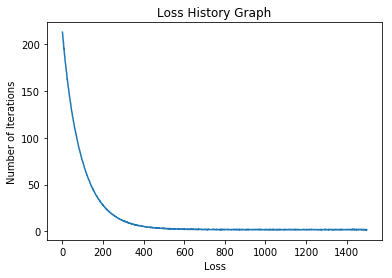

In [49]:
## plotting the graph
plt.plot(loss_hist)
plt.xlabel('Loss')
plt.ylabel('Number of Iterations')
plt.title('Loss History Graph')
plt.show()

## Predicting on Training And Validation Set

In [50]:
## making a function to return predictions using the trained weights

def predict(x):
    
    ## y_pred must have a shape of (N,1) where N is number of examples in x
    y_pred = np.zeros(x.shape[1])
    
    ## currently y_pred has a shape of (N,C) where C is number of classes in x i.e. this is a collection of 1 hot arrays
    y_pred = np.dot(x,W)
    
    ## converting from 1 hot array into 1 dimensional array  i.e. in a label vector
    y_pred = np.argmax(y_pred, axis = 1)
    
    return y_pred


## predictions on the training set

y_train_pred = predict(x_train)
## calculating training accuracy
train_accuracy = np.mean(y_train == y_train_pred)
print("Training Accuracy : {}\n\n".format(train_accuracy))


## predictions on the validation set

y_val_pred = predict(x_val)
## calculating training accuracy
val_accuracy = np.mean(y_val == y_val_pred)
print("Validation Accuracy : {}\n\n".format(val_accuracy))

Training Accuracy : 0.8699


Validation Accuracy : 0.849




## Tuning The Hyperparameters
### Using the validation set to experiment with different values of learning_rate and regularization parameter 

In [51]:
learning_rates = [1e-8, 1e-7, 2e-7]
regularization_strengths = [2.5e4, 5e4]

results = {}
best_val = -1


for lr in learning_rates:
    for reg in regularization_strengths:
        
        loss_hist, W = train(x_train, y_train, learning_rate = lr, reg= reg, num_iters=1500)
        
        y_train_pred = predict(x_train)
        acc_train = np.mean(y_train == y_train_pred)
        
        y_val_pred = predict(x_val)
        acc_val = np.mean(y_val == y_val_pred)
        
        results[(lr, reg)] = (acc_train, acc_val)
        
        if acc_val > best_val:
            best_val = acc_val

for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('\n\nBest Validation Accuracy Achieved During Cross-Validation: %f' % best_val)

lr 1.000000e-08 reg 2.500000e+04 train accuracy: 0.693017 val accuracy: 0.644500
lr 1.000000e-08 reg 5.000000e+04 train accuracy: 0.783967 val accuracy: 0.751000
lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.870750 val accuracy: 0.845000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.856967 val accuracy: 0.834500
lr 2.000000e-07 reg 2.500000e+04 train accuracy: 0.871283 val accuracy: 0.849500
lr 2.000000e-07 reg 5.000000e+04 train accuracy: 0.856783 val accuracy: 0.831000


Best Validation Accuracy Achieved During Cross-Validation: 0.849500


## Training the model on best hyperparameters

In [54]:
loss_history, W = train(x_train, y_train, learning_rate = 2e-7, reg= 2.5e4, num_iters=1500)

## Printing Templates Derived After Training Weights

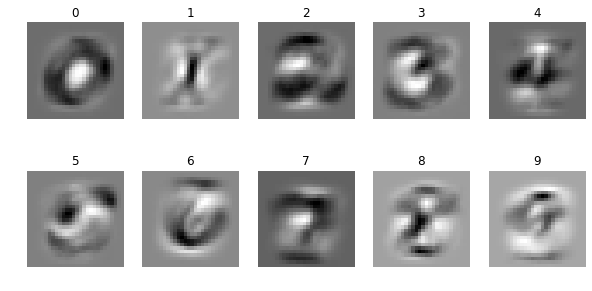

In [66]:
## strip out the bias term
w = W[:-1, :]
w = w.reshape(28, 28, 10)
w_min, w_max = np.min(w), np.max(w)

## classes list
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
## number of classes
num_classes = len(classes)
plt.figure(figsize = (10,5))
for i in range(num_classes):
    plt.subplot(2, 5, i+1)
    
    ## rescaling the weights to be between 0 and 255
    wimg = 255*(w[:, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg, cmap = plt.cm.binary)
    plt.axis('off')
    plt.title(classes[i])